In [8]:
from torchvision.models import resnet18
from torchvision import transforms
from PIL import Image
import torch
import matplotlib.pyplot as plt
model = resnet18(pretrained=True).eval()

In [9]:
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [10]:
paths = ["../data/figure_data/dog.jpg", "../data/figure_data/chair.jpg", "../data/figure_data/car.jpeg"]
imgs = [preprocess(Image.open(p).convert("RGB")).unsqueeze(0) for p in paths]

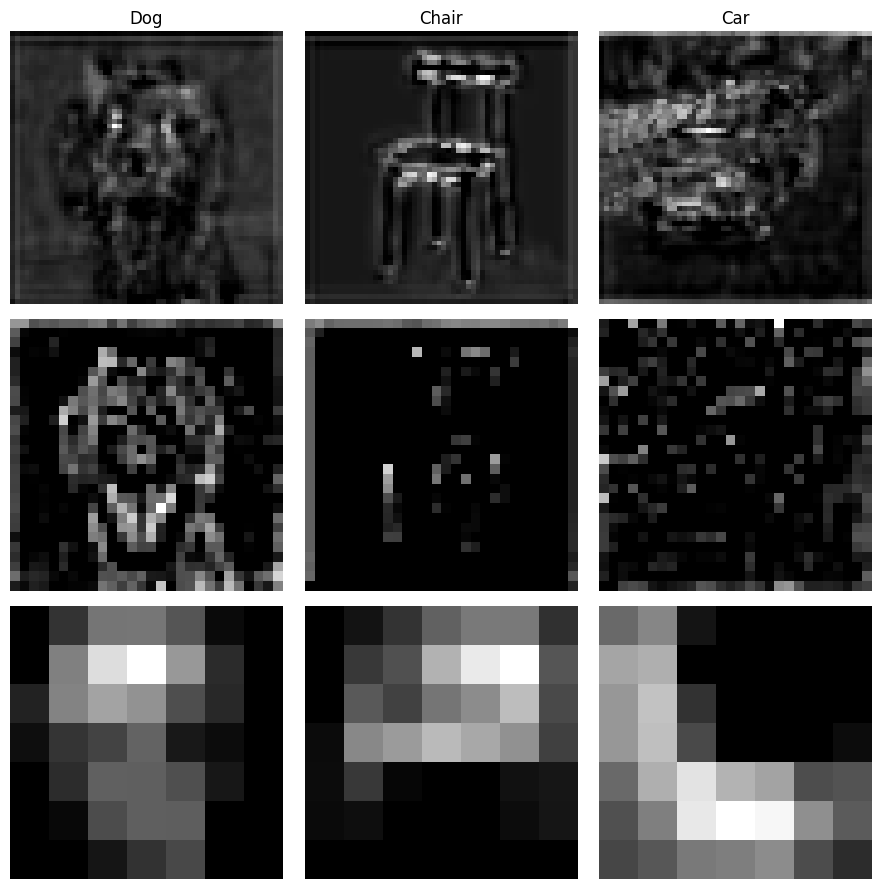

In [11]:
model.eval()
activations = {}

def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

model.layer1.register_forward_hook(get_activation('low'))
model.layer2.register_forward_hook(get_activation('mid'))
model.layer4.register_forward_hook(get_activation('high'))

fig, axes = plt.subplots(3, 3, figsize=(9, 9))

labels = ["Low Level (Edges)", "Mid Level (Parts)", "High Level (Objects)"]
titles = ["Dog", "Chair", "Car"]

for idx, img in enumerate(imgs):
    _ = model(img)
    
    low = activations['low'][0]
    mid = activations['mid'][0]
    high = activations['high'][0]
    
    axes[0, idx].imshow(low[0].cpu(), cmap='gray')
    axes[1, idx].imshow(mid[0].cpu(), cmap='gray')
    axes[2, idx].imshow(high[0].cpu(), cmap='gray')

for ax, label in zip(axes[:, 0], labels):
    ax.set_ylabel(label, fontsize=10, rotation=0, labelpad=60, va="center")

for ax, title in zip(axes[0], titles):
    ax.set_title(title, fontsize=12)

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.savefig("../outputs/feature_maps_summary.pdf")
plt.show()